In [1]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw, ImageOps
import string
import numpy as np
import cv2

Using TensorFlow backend.


In [3]:
#set the seed
np.random.seed(seed=123)

### Function to generate watermarks on images:

In [10]:
#list of printable characters that could appear in a watermark
prints = list(string.printable)[0:84]

def gen_watermark(im_str, train = 1):
    
    #open all of the images from the VOC2008 dataset as jpegs
    img = Image.open("/gpfs_home/guest321/FinalProj/FinalProjectFinal/VOCdevkit/VOC2008/JPEGImages/{}".format(im_str))
    
    #save original image as np array to 'RAWS' directory
    img.save('/gpfs_home/guest321/FinalProj/FinalProjectFinal/RAWS/raw_imgs/{}'.format(im_str))
    
    #generate random font size between 30-100
    font_size = np.random.randint(low = 20, high = 100)
    
    #create the watermark font for the image
    font = ImageFont.truetype("abel-regular.ttf", font_size) 
    
    #generate image to hold the watermark text object
    img_temp = Image.new('L', (350,350))
    
    #create the watermark text, of random length, using random printable characters
    text_str = np.random.choice(prints, np.random.randint(low=5, high = 10))
    text_str = "".join(text_str)
    
    #draw on temporary image with text
    draw_temp = ImageDraw.Draw(img_temp) 
    
    #generate a random integer for the opacity argument (fill)
    opac = np.random.randint(low=90, high=120)
    
    #insert text onto the temporary image
    draw_temp.text((0, 0), text_str,  font=font, fill=opac)
    
    #generate a random integer for rotation:
    rot_int = np.random.randint(low = 0, high = 20)
    
    #rotate the text on the temporary image
    rotated_text = img_temp.rotate(rot_int,  expand=1)
    
    #default color of watermark set to white; change if desired
    col_1 = (255,255,255)
    col_2 = (255,255,255)
    
    #generate a random location for the watermark on the image
    rand_loc = tuple(np.random.randint(low=10,high=100, size = (2,)))
    
    #merge the temporary image with text with the image passed in 
    #third tuple also needs to be random: controls the location of the img
    img.paste(ImageOps.colorize(rotated_text, col_1, col_2), rand_loc,  rotated_text)
    
    #this yeilds a new image with a watermark
    #save this jpeg with a watermark to the WATS directory
    img.save('/gpfs_home/guest321/FinalProj/FinalProjectFinal/WATS/wat_imgs/{}'.format(im_str))

### Creating the directories to hold the original and watermarked images:

In [8]:
rpath = "/gpfs_home/guest321/FinalProj/FinalProjectFinal/RAWS"
wpath = "/gpfs_home/guest321/FinalProj/FinalProjectFinal/WATS"

if not os.path.exists(rpath):
    os.mkdir(rpath)
    os.mkdir("/gpfs_home/guest321/FinalProj/FinalProjectFinal/RAWS/raw_imgs")
else:
    shutil.rmtree(rpath)  
    
if not os.path.exists(wpath):
    os.mkdir(wpath)
    os.mkdir("/gpfs_home/guest321/FinalProj/FinalProjectFinal/WATS/wat_imgs")
else:
    shutil.rmtree(wpath)

### Generate images with and without watermarks:

In [11]:
#generate 
im_list = os.listdir("/gpfs_home/guest321/FinalProj/FinalProjectFinal/VOCdevkit/VOC2008/JPEGImages")

#run time is about 5-6 minutes for all 5000 images:
for ind, img in enumerate(im_list):
    
    #add the watermark to the image and save to 'watered' directory
    wat_img = gen_watermark(img)

### Examples below:

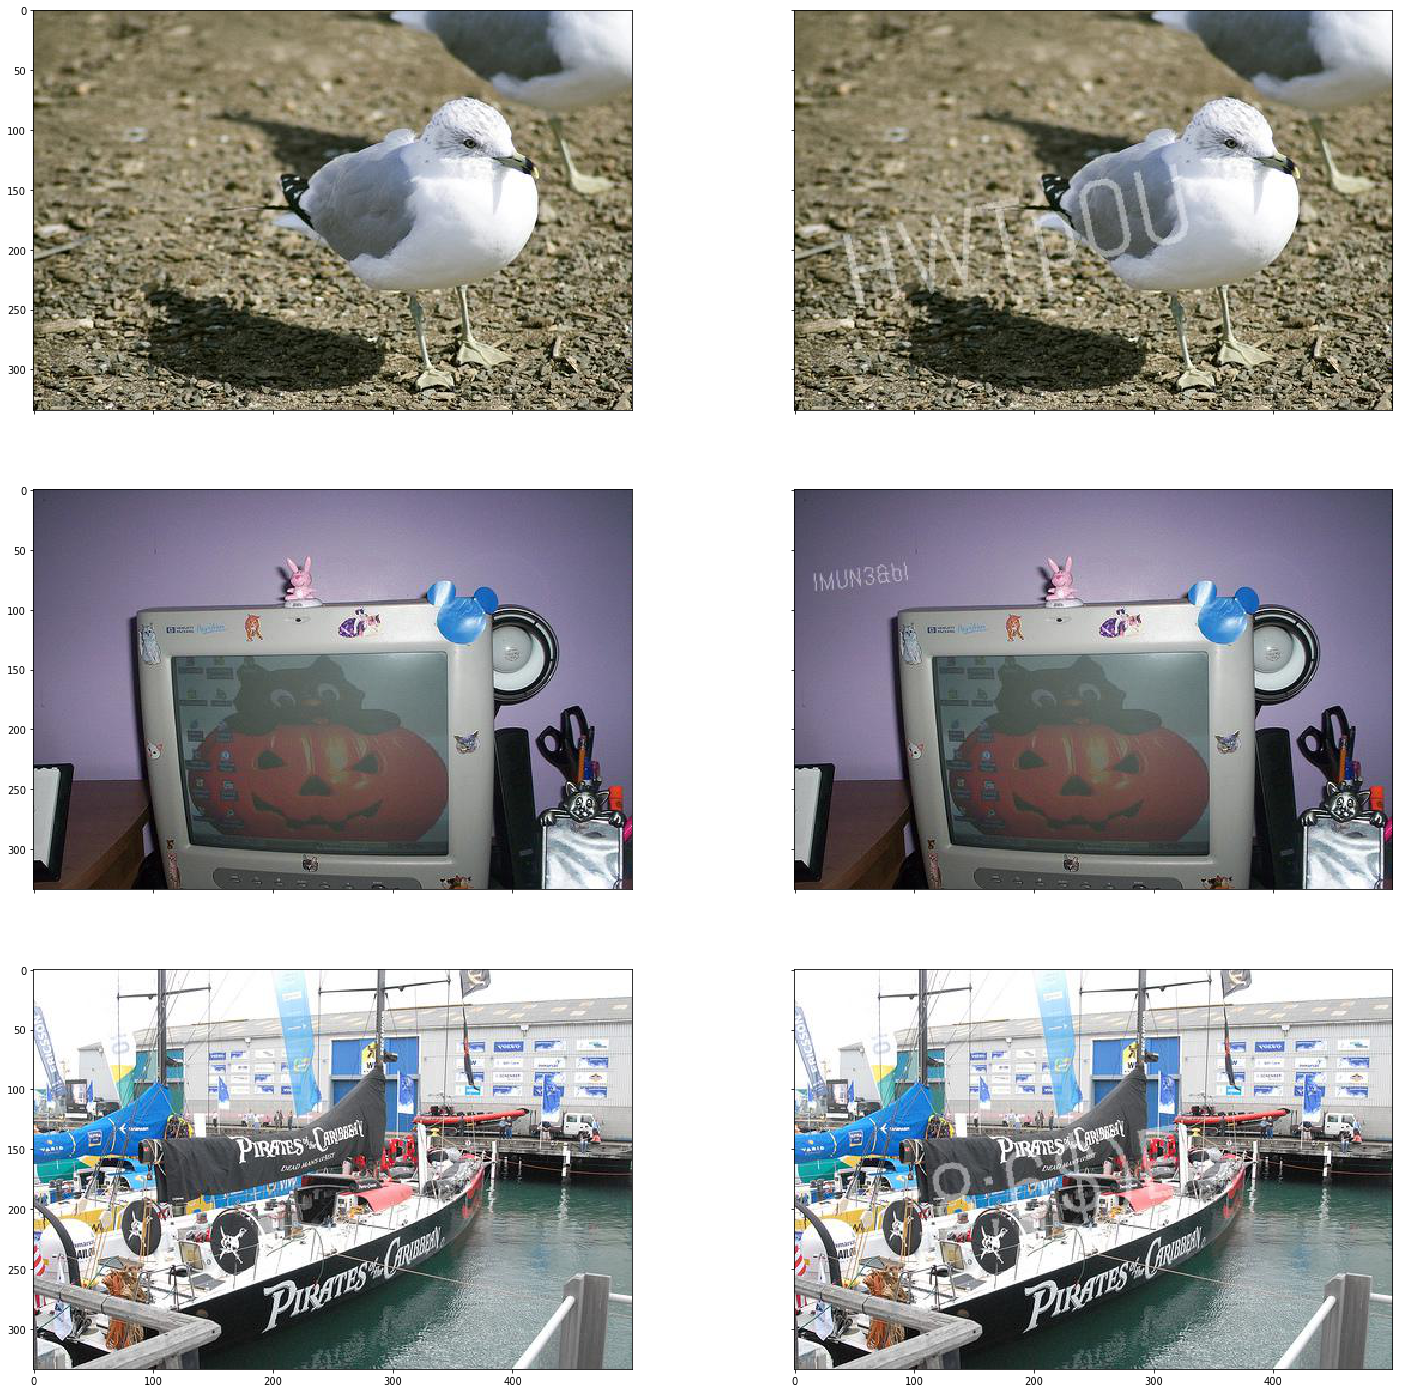

<Figure size 432x288 with 0 Axes>

In [2]:
dir_raw = os.listdir("/gpfs_home/guest321/FinalProj/FinalProjectFinal/RAWS/raw_imgs")
dir_wats = os.listdir("/gpfs_home/guest321/FinalProj/FinalProjectFinal/WATS/wat_imgs")

#example: 
raw_str = "/gpfs_home/guest321/FinalProj/FinalProjectFinal/RAWS/raw_imgs/"
wat_str = "/gpfs_home/guest321/FinalProj/FinalProjectFinal/WATS/wat_imgs/"

f, axs = plt.subplots(3,2, figsize=(25, 25), sharey=True, sharex = True)
axs = axs.ravel()

img_raw = Image.open(raw_str + dir_raw[4])
img_wat = Image.open(wat_str + dir_wats[4])
axs[0].imshow(img_raw)
axs[1].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[5])
img_wat = Image.open(wat_str + dir_wats[5])
axs[2].imshow(img_raw)
axs[3].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[10])
img_wat = Image.open(wat_str + dir_wats[10])
axs[4].imshow(img_raw)
axs[5].imshow(img_wat)

plt.show()